In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1) Data Importing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('D:\mca-mini project\ml\placedata v2.0 synthetic.csv')

# 2) Data Inspecting

In [7]:
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [8]:
data.tail()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


# 3) Data Preprocessing

### Removing StudentID column:

In [10]:
data.drop(columns='StudentID', inplace = True)

### Are there any nulls?

In [11]:
data.isna().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

### Are there any duplicates?

In [12]:
data.duplicated().sum()

72

### Are there outliers?

In [13]:
data.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


# 4) Data Analysis

In [14]:
CGPA_effect = data.pivot_table(index = 'PlacementStatus', values= ['CGPA', 'SoftSkillsRating'])
CGPA_effect

,CGPA,SoftSkillsRating
PlacementStatus,,
NotPlaced,7.467672,4.174393
Placed,8.016488,4.530760


Soft skills rating and CGPA affect greatly.

In [15]:
Internships_effect = data.pivot_table(index = 'PlacementStatus', values= 'CGPA' , columns='Internships', aggfunc='count')
Internships_effect

Internships,0,1,2
PlacementStatus,,,
NotPlaced,1320,3733,750
Placed,663,1809,1725


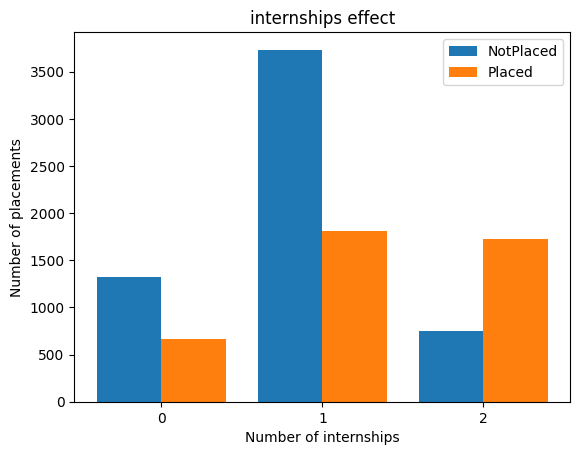

In [16]:
X = Internships_effect.columns
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Internships_effect.iloc[0,:], 0.4, label = 'NotPlaced')
plt.bar(X_axis + 0.2, Internships_effect.iloc[1,:], 0.4, label = 'Placed')

plt.xticks(X_axis, X)
plt.xlabel("Number of internships")
plt.ylabel("Number of placements")
plt.title("internships effect")
plt.legend()
plt.show()


from this table we Concludes that:
- If you don't have any internships Your chances will be slim.
- One internship is not enough
- Two internships make your chances greater

In [17]:
Projects_effect = data.pivot_table(index = 'PlacementStatus', values= 'CGPA' , columns='Projects', aggfunc='count')
Projects_effect

Projects,0,1,2,3
PlacementStatus,,,,
NotPlaced,12,2949,1750,1092
Placed,18,598,800,2781


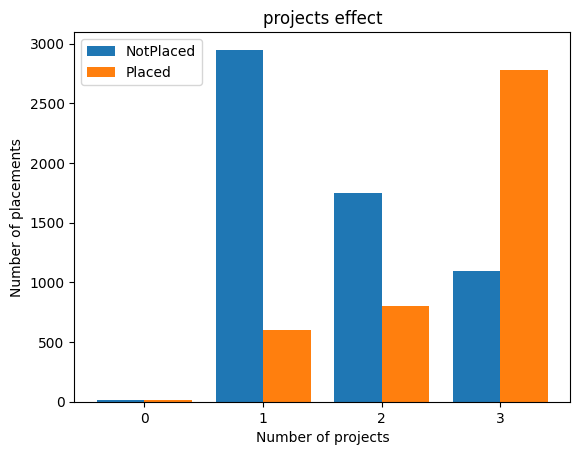

In [18]:
X = Projects_effect.columns
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Projects_effect.iloc[0,:], 0.4, label = 'NotPlaced')
plt.bar(X_axis + 0.2, Projects_effect.iloc[1,:], 0.4, label = 'Placed')

plt.xticks(X_axis, X)
plt.xlabel("Number of projects")
plt.ylabel("Number of placements")
plt.title("projects effect")
plt.legend()
plt.show()


from this table we Concludes that:
- Most people do projects
- Three projects make your chances greater

In [19]:
Workshops_effect = data.pivot_table(index = 'PlacementStatus', values= 'CGPA' , columns='Workshops/Certifications', aggfunc='count')
Workshops_effect

Workshops/Certifications,0,1,2,3
PlacementStatus,,,,
NotPlaced,2678,2111,890,124
Placed,1061,563,2413,160


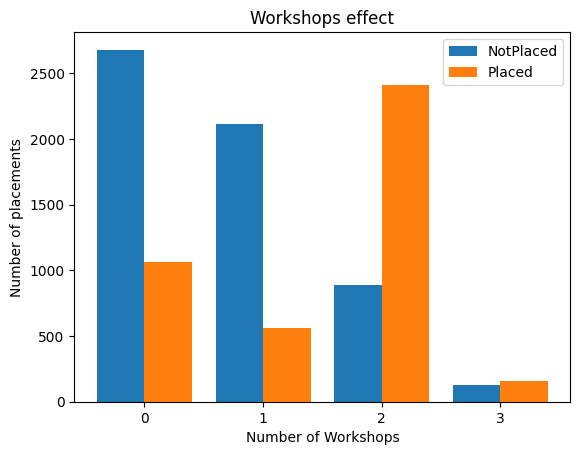

In [20]:
X = Workshops_effect.columns
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Workshops_effect.iloc[0,:], 0.4, label = 'NotPlaced')
plt.bar(X_axis + 0.2, Workshops_effect.iloc[1,:], 0.4, label = 'Placed')

plt.xticks(X_axis, X)
plt.xlabel("Number of Workshops")
plt.ylabel("Number of placements")
plt.title("Workshops effect")
plt.legend()
plt.show()


from this table we Concludes that:
- Few people take three workshops
- More than one workshop makes your chances greater

In [21]:
marks_effect = data.pivot_table(index = 'PlacementStatus', values= ['AptitudeTestScore', 'SSC_Marks', 'HSC_Marks'])
marks_effect

,AptitudeTestScore,HSC_Marks,SSC_Marks
PlacementStatus,,,
NotPlaced,75.829399,70.665346,64.992590
Placed,84.455802,79.805575,74.920658


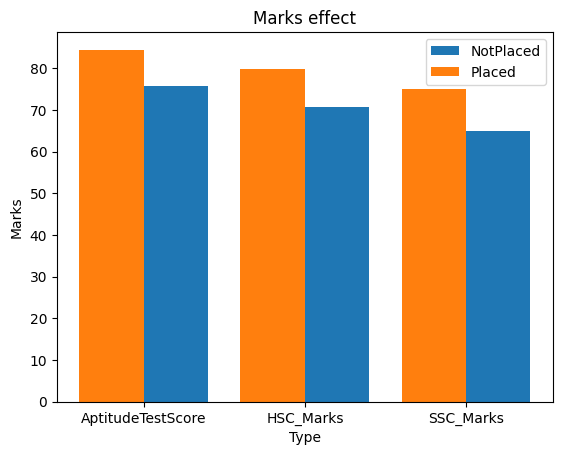

In [22]:
X = marks_effect.columns
X_axis = np.arange(len(X))

plt.bar(X_axis + 0.2, marks_effect.iloc[0,:], 0.4, label = 'NotPlaced')
plt.bar(X_axis - 0.2, marks_effect.iloc[1,:], 0.4, label = 'Placed')

plt.xticks(X_axis, X)
plt.xlabel("Type")
plt.ylabel("Marks")
plt.title("Marks effect")
plt.legend()
plt.show()


Aptitude test score must be greet

In [23]:
ExtracurricularActivities_effect = data.pivot_table(index = 'PlacementStatus', values= 'CGPA' , columns=['ExtracurricularActivities'], aggfunc='count')
ExtracurricularActivities_effect

ExtracurricularActivities,No,Yes
PlacementStatus,,
NotPlaced,3579,2224
Placed,567,3630


If you have extracurricular activities it make your chances greater.

In [24]:
PlacementTraining_effect = data.pivot_table(index = 'PlacementStatus', values= 'CGPA' , columns='PlacementTraining', aggfunc='count')
PlacementTraining_effect

PlacementTraining,No,Yes
PlacementStatus,,
NotPlaced,2264,3539
Placed,418,3779


If you have placement training it make your chances greater.

In [25]:
data.PlacementStatus.value_counts()

NotPlaced    5803
Placed       4197
Name: PlacementStatus, dtype: int64

<Axes: >

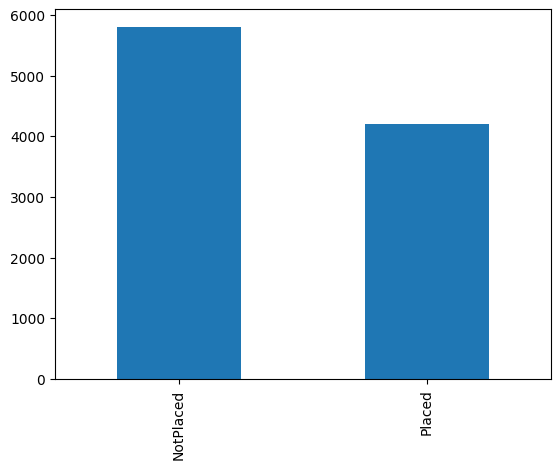

In [26]:
data.PlacementStatus.value_counts().plot(kind = 'bar')

More than half of people are not placed.

# 5) Data Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns : 
  if data[col].dtypes =='object' : 
    enc  = LabelEncoder()
    enc.fit(data[col].astype(str))
    data[f'{col}_'] = enc.transform(data[col].astype(str))
    data.drop([col],axis=1, inplace=True)      

In [28]:
data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_,PlacementTraining_,PlacementStatus_
0,7.5,1,1,1,65,4.4,61,79,0,0,0
1,8.9,0,3,2,90,4.0,78,82,1,1,1
2,7.3,1,2,2,82,4.8,79,80,1,0,0
3,7.5,1,1,2,85,4.4,81,80,1,1,1
4,8.3,1,2,2,86,4.5,74,88,1,1,1


In [29]:
data.rename(columns={'ExtracurricularActivities_': 'ExtracurricularActivities',
                    'PlacementTraining': 'PlacementTraining',
                    'PlacementStatus_': 'PlacementStatus'}, inplace= True)

In [30]:
data.corr()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities,PlacementTraining_,PlacementStatus
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.404971,0.462313,0.444130,0.251628,0.423131
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.279837,0.317149,0.274960,0.153547,0.260340
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.499421,0.535708,0.491430,0.293709,0.475186
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373045,0.418442,0.373926,0.180333,0.362268
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.513044,0.565105,0.474130,0.314772,0.521744
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.430734,0.466912,0.448049,0.235571,0.427284
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,1.000000,0.524916,0.517850,0.257440,0.469763
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.524916,1.000000,0.533572,0.325434,0.505746
ExtracurricularActivities,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,0.517850,0.533572,1.000000,0.327158,0.482491
PlacementTraining_,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.257440,0.325434,0.327158,1.000000,0.323659


<Axes: >

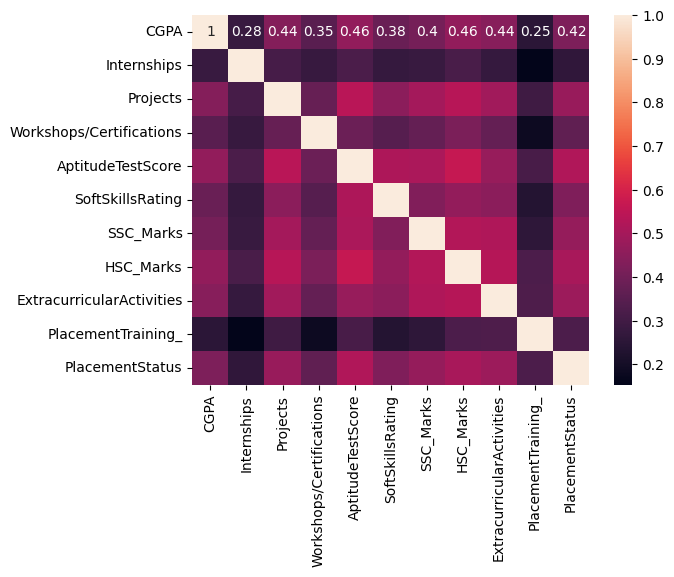

In [31]:
sns.heatmap(data.corr(), annot = True)

# 6) data splitting

In [32]:
X = data.drop(columns= 'PlacementStatus')
y = data['PlacementStatus']

In [33]:
# Import Libraries
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (6700, 10)
X_test shape is  (3300, 10)
y_train shape is  (6700,)
y_test shape is  (3300,)


# 7) Try the popular classifiers

In [34]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

###########################################

GaussianNBModel = GaussianNB()
MultinomialNBModel = MultinomialNB(alpha=1.0)
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2',learning_rate='optimal',random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33) 
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto') 

Models = [GaussianNBModel,KNNClassifierModel,MultinomialNBModel,
          BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
          GBCModel,SGDClassifierModel,QDAModel,SVCModel,DecisionTreeClassifierModel]


###########################################


ModelsScore = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')    

for Model GaussianNB
Train Score is : 0.7959701492537313
Test Score is : 0.7948484848484848
Classification Report is : 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1924
           1       0.74      0.79      0.76      1376

    accuracy                           0.79      3300
   macro avg       0.79      0.79      0.79      3300
weighted avg       0.80      0.79      0.80      3300

Precision value is  : 0.79
Recall value is  : 0.79
F1 Score value is  : 0.79
for Model KNeighborsClassifier
Train Score is : 0.8216417910447761
Test Score is : 0.7645454545454545
Classification Report is : 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1924
           1       0.72      0.71      0.71      1376

    accuracy                           0.76      3300
   macro avg       0.76      0.76      0.76      3300
weighted avg       0.76      0.76      0.76      3300

Precision value i

c:\Users\ashin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train Score is : 0.7670149253731343
Test Score is : 0.7612121212121212
Classification Report is : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1924
           1       0.71      0.72      0.72      1376

    accuracy                           0.76      3300
   macro avg       0.75      0.76      0.75      3300
weighted avg       0.76      0.76      0.76      3300

Precision value is  : 0.75
Recall value is  : 0.76
F1 Score value is  : 0.75
for Model RandomForestClassifier
Train Score is : 0.8323880597014925
Test Score is : 0.7975757575757576
Classification Report is : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1924
           1       0.76      0.74      0.75      1376

    accuracy                           0.80      3300
   macro avg       0.79      0.79      0.79      3300
weighted avg       0.80      0.80      0.80      3300

Precision value is  : 0.79
Recall va

c:\Users\ashin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gradient Boosting Classifier is the most convenient.

# 8) model fitting (Gradient Boosting Classifier)

In [35]:
#Applying GradientBoostingClassifier Model 
GBCModel = GradientBoostingClassifier(n_estimators=80,max_depth=3,random_state=44) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))




GBCModel Train Score is :  0.8150746268656717
GBCModel Test Score is :  0.806060606060606


In [36]:
#Calculating Prediction
y_pred = GBCModel.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [38]:
y_test.values

array([0, 0, 0, ..., 0, 1, 1])

# 9) Model Evaluation

In [39]:
#Import Libraries
from sklearn.metrics import classification_report
#----------------------------------------------------

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1924
           1       0.78      0.75      0.76      1376

    accuracy                           0.81      3300
   macro avg       0.80      0.80      0.80      3300
weighted avg       0.81      0.81      0.81      3300



In [41]:
import pickle

In [42]:
pickle.dump(GBCModel, open('gb_model.pkl', 'wb'))#self done

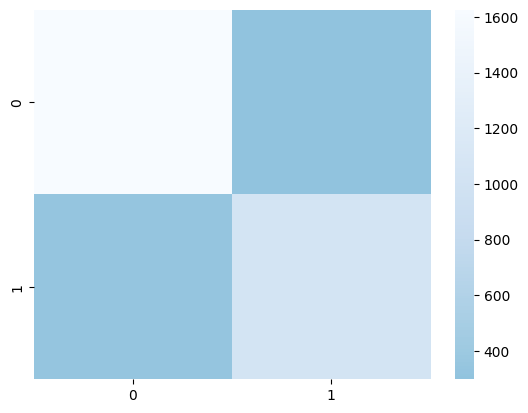

In [40]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------------

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

## Thank you for reading.
## Leave a comment if you have any modifications.
## Good Luck!